In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.patches import Ellipse # Pour représenter le cercle de corrélation

warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('temp_data.xlsx',index_col=0)
# df = pd.read_csv('my_courses.csv',index_col=0)
df.head()

,jan,fev,mars,avril,mai,juin,juil,aôut,sept,oct,nov,dec,lati,long
villes,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43
Lille,2.3,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04


In [3]:
df.isnull().sum()

jan      0
fev      0
mars     0
avril    0
mai      0
juin     0
juil     0
aôut     0
sept     0
oct      0
nov      0
dec      0
lati     0
long     0
dtype: int64

In [4]:
# df['moyenneDeClasse'] = df['moyenneDeClasse'].fillna(df['moyenneDeClasse'].mean())
# df['duree'] = df['duree'].fillna(df['duree'].mean())
# df['ratioQuizEvaluation'] = df['ratioQuizEvaluation'].fillna(df['ratioQuizEvaluation'].median())

In [5]:
# df.isnull().sum()

In [6]:
# df = df.drop('idCours', axis=1)
df = df.drop(['long', 'lati'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Bordeaux to Vichy
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   jan     15 non-null     float64
 1   fev     15 non-null     float64
 2   mars    15 non-null     float64
 3   avril   15 non-null     float64
 4   mai     15 non-null     float64
 5   juin    15 non-null     float64
 6   juil    15 non-null     float64
 7   aôut    15 non-null     float64
 8   sept    15 non-null     float64
 9   oct     15 non-null     float64
 10  nov     15 non-null     float64
 11  dec     15 non-null     float64
dtypes: float64(12)
memory usage: 1.5+ KB


In [8]:
# STats Descriptives
df.describe(include='all').round(2)

,jan,fev,mars,avril,mai,juin,juil,aôut,sept,oct,nov,dec
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,3.97,4.83,8.23,10.98,14.43,17.83,19.83,19.57,16.99,12.32,7.93,4.85
std,2.01,1.87,1.53,1.41,1.50,1.79,2.13,2.01,1.85,1.83,1.80,1.96
min,0.40,1.50,5.60,8.90,11.60,14.40,15.60,16.00,14.70,9.50,4.90,1.30
25%,2.35,3.35,7.55,10.00,13.70,17.15,18.90,18.45,15.85,11.30,6.60,3.45
50%,4.70,5.30,7.80,10.70,14.30,17.50,19.40,19.10,16.40,11.60,7.80,5.40
75%,5.55,6.20,9.55,12.20,15.35,19.00,20.90,20.95,18.45,13.55,9.05,6.35
max,7.50,8.50,10.80,13.30,16.80,20.80,23.30,22.80,20.30,16.00,11.50,8.20


In [9]:
# Dimensions de notre tableau
row = df.shape[0]
col = df.shape[1]
print(f'{row} lignes et {col} colonnes')

15 lignes et 12 colonnes


## Liaison entre Individus<br>
**On cherche à définir quand est-ce qu'ils se ressemblent du point de vu de l'ensemble des colonnes**<br>L'analyse des individus revient à analyser leur **variabilité**

***Calcul de la distance(Distance Euclidienne) entre les Individus***<br>
**2 points sont voisins si l'ensemble de leurs K coordonnées sont très proche**

In [10]:
def distance(x, y):
    return np.sum((x-y)**2)

#Calcul de la distance
dist_tab = pd.DataFrame(np.zeros(shape=(row,row),dtype=float),index = df.index,columns = df.index)
for i in range(row):
    for j in range(i+1,row):
        dist_tab.values[i,j] = distance(df.values[i,:],df.values[j,:])
        
dist_tab.round(2)

villes,Bordeaux,Brest,Clermont,Grenoble,Lille,Lyon,Marseille,Montpellier,Nantes,Nice,Paris,Rennes,Strasbourg,Toulouse,Vichy
villes,,,,,,,,,,,,,,,
Bordeaux,0.0,133.94,70.89,78.14,158.55,59.83,17.22,7.93,36.55,32.15,56.94,67.10,175.08,6.72,84.90
Brest,0.0,0.00,75.47,115.06,54.31,121.37,231.30,191.35,40.33,241.27,61.86,21.94,142.34,108.26,74.66
Clermont,0.0,0.00,0.00,4.97,23.34,6.94,132.49,105.88,17.22,190.66,2.33,18.33,26.67,37.69,0.75
Grenoble,0.0,0.00,0.00,0.00,38.53,2.55,132.08,108.41,34.27,200.81,11.06,40.18,22.14,43.64,6.00
Lille,0.0,0.00,0.00,0.00,0.00,51.90,253.85,214.64,47.96,316.82,27.79,28.43,25.01,108.89,17.19
Lyon,0.0,0.00,0.00,0.00,0.00,0.00,103.75,83.80,30.36,168.90,10.67,41.61,33.71,30.45,9.83
Marseille,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2.25,94.65,13.83,117.84,141.22,253.90,31.60,150.22
Montpellier,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69.58,16.30,91.97,110.01,221.21,18.45,121.97
Nantes,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,123.00,8.45,4.89,82.09,19.39,21.83


***Ce tableau étant difficilement visible, nous allons le visualiser à l'aide d'un heatmap***

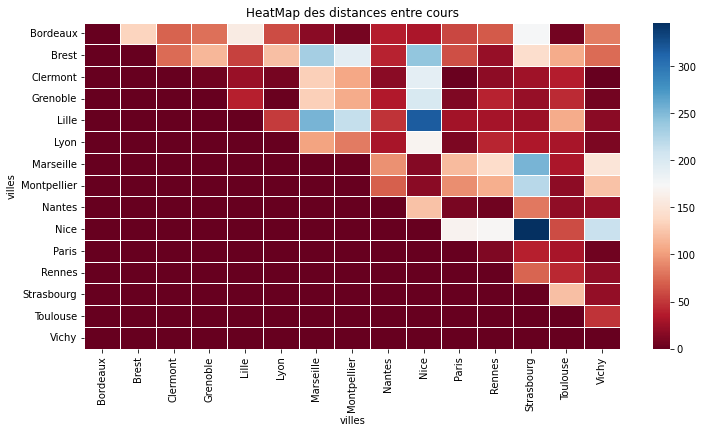

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(dist_tab, xticklabels=dist_tab.columns, yticklabels=dist_tab.columns, 
            cmap='RdBu', linewidths=0.8)
plt.title('HeatMap des distances entre cours')
plt.show()

## Liaison entre variables<br>
**Ici nous cherchons des ressemblances entre variables : quelles sont les variables qui apportent une information à peu près identiques. Quelles sont les variables qui apportent des informations différentes ? Entre variables, plutôt que de ressemblance, on parle souvent de liaison et les liaisons les plus connues sont les liaisons linéaires.**

***Pour mesurer cette liaison on utilise un indicateur comme le COÉFFICIENT DE CORRÉLATION LINÉAIRE***

L’analyse des liaisons entre deux variables quantitatives s’effectue généralement à travers le
**coefficient de corrélation linéaire de Pearson**. C’est un indicateur statistique, noté généralement ***ρ***,
compris entre −1 et 1. Plus la valeur absolue du coefficient est importante, plus la relation linéaire
entre les variables est forte. Ainsi, pour la corrélation linéaire de Pearson, une valeur absolue de
1 indique une relation linéaire parfaite.

In [12]:
corr = df.corr(method='pearson')
corr.round(2)

,jan,fev,mars,avril,mai,juin,juil,aôut,sept,oct,nov,dec
jan,1.00,0.97,0.84,0.61,0.37,0.34,0.30,0.41,0.61,0.85,0.95,0.99
fev,0.97,1.00,0.93,0.76,0.55,0.52,0.49,0.59,0.76,0.94,0.99,0.97
mars,0.84,0.93,1.00,0.92,0.77,0.76,0.72,0.80,0.91,0.97,0.93,0.83
avril,0.61,0.76,0.92,1.00,0.95,0.94,0.91,0.95,0.98,0.91,0.78,0.62
mai,0.37,0.55,0.77,0.95,1.00,0.99,0.98,0.98,0.94,0.77,0.59,0.38
juin,0.34,0.52,0.76,0.94,0.99,1.00,0.99,0.99,0.94,0.76,0.57,0.36
juil,0.30,0.49,0.72,0.91,0.98,0.99,1.00,0.99,0.93,0.74,0.55,0.32
aôut,0.41,0.59,0.80,0.95,0.98,0.99,0.99,1.00,0.97,0.81,0.64,0.43
sept,0.61,0.76,0.91,0.98,0.94,0.94,0.93,0.97,1.00,0.93,0.80,0.62
oct,0.85,0.94,0.97,0.91,0.77,0.76,0.74,0.81,0.93,1.00,0.96,0.87


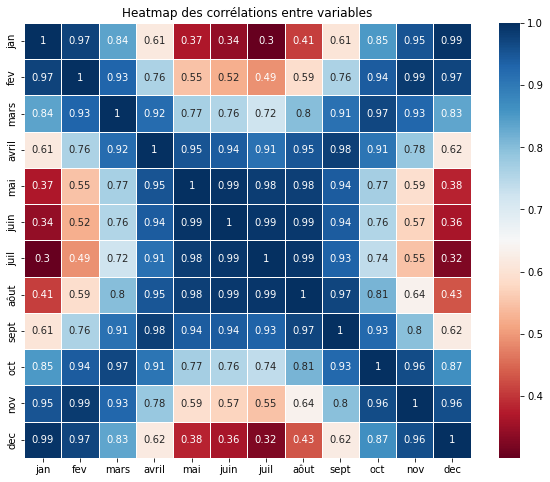

In [13]:
# Visualisation de la matrice
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', linewidths=0.8, annot=True)
plt.title('Heatmap des corrélations entre variables')
plt.show()

***En ACP, les données sont toujours centrées. A chaque valeur, on soustrait la moyenne de la variable en cause***

In [14]:
# Centrage des données
def centrage(x):
    return x - x.mean()

df_centre = df.transform(centrage)
df_centre.round(2).head()

,jan,fev,mars,avril,mai,juin,juil,aôut,sept,oct,nov,dec
villes,,,,,,,,,,,,
Bordeaux,1.63,1.77,2.07,1.82,1.37,1.47,1.07,1.43,1.61,1.48,1.17,1.35
Brest,2.13,0.97,-0.43,-1.78,-2.83,-3.43,-4.23,-3.57,-2.29,-0.32,1.07,2.15
Clermont,-1.37,-1.13,-0.73,-0.68,-0.63,-0.53,-0.43,-0.47,-0.79,-1.12,-1.33,-1.25
Grenoble,-2.47,-1.63,-0.53,-0.38,0.07,-0.03,0.27,-0.07,-0.29,-0.92,-1.43,-2.55
Lille,-1.67,-1.93,-2.23,-2.08,-2.03,-2.53,-2.73,-2.47,-2.29,-1.92,-1.83,-1.35


***Dans le cas où les variables s'expriment dans la même unité, on peut ne pas réduire les données, mais pas ici<br>Avec Sklearn on peut utiliser la fonction StandardScaler()***

In [15]:
# Centrage et Réduction
def StandardScaler(x):
    return (x - x.mean())/x.std(ddof=0)

df_scaled = df.transform(StandardScaler)
df_scaled.round(2)

,jan,fev,mars,avril,mai,juin,juil,aôut,sept,oct,nov,dec
villes,,,,,,,,,,,,
Bordeaux,0.84,0.98,1.40,1.33,0.94,0.85,0.52,0.74,0.90,0.84,0.67,0.72
Brest,1.10,0.54,-0.29,-1.30,-1.95,-1.98,-2.06,-1.83,-1.28,-0.18,0.62,1.14
Clermont,-0.70,-0.63,-0.50,-0.50,-0.44,-0.31,-0.21,-0.24,-0.44,-0.63,-0.76,-0.66
Grenoble,-1.27,-0.90,-0.36,-0.28,0.05,-0.02,0.13,-0.03,-0.16,-0.52,-0.82,-1.35
Lille,-0.86,-1.07,-1.51,-1.52,-1.40,-1.46,-1.33,-1.27,-1.28,-1.09,-1.05,-0.71
Lyon,-0.96,-0.85,-0.36,-0.06,0.32,0.38,0.42,0.27,-0.05,-0.52,-0.70,-0.92
Marseille,0.79,0.98,1.20,1.48,1.63,1.71,1.69,1.66,1.63,1.52,1.30,1.09
Montpellier,0.84,1.03,1.13,1.33,1.22,1.31,1.39,1.41,1.30,1.29,1.19,0.87
Nantes,0.53,0.26,0.11,-0.13,-0.37,-0.37,-0.50,-0.50,-0.33,-0.07,0.16,0.35


**Interprétation**<br>
La valeur −2 signifie que ce sont des valeurs inférieures à la moyenne et assez extrêmes. On sait que si les valeurs d’une variable suivent une loi normale,alors 95% des valeurs centrées-réduites sont comprises entre −1.96 et 1.96. Ici, on ne sait pas si les données suivent une loi normale, mais une valeur centrée-réduite de −2 est très extrême.<br>
Dans notre cas, nous pouvons dire que le cours ***Apprenez à programmer en python*** est un cours qui a une très longue durée...

***Pour analyser ce tableau, nous devons le visualiser. Pour celà nous allons calculer la distance euclidienne pondérée entre les individus***

**Celà revient calculer la distance entre les données centrées réduites**

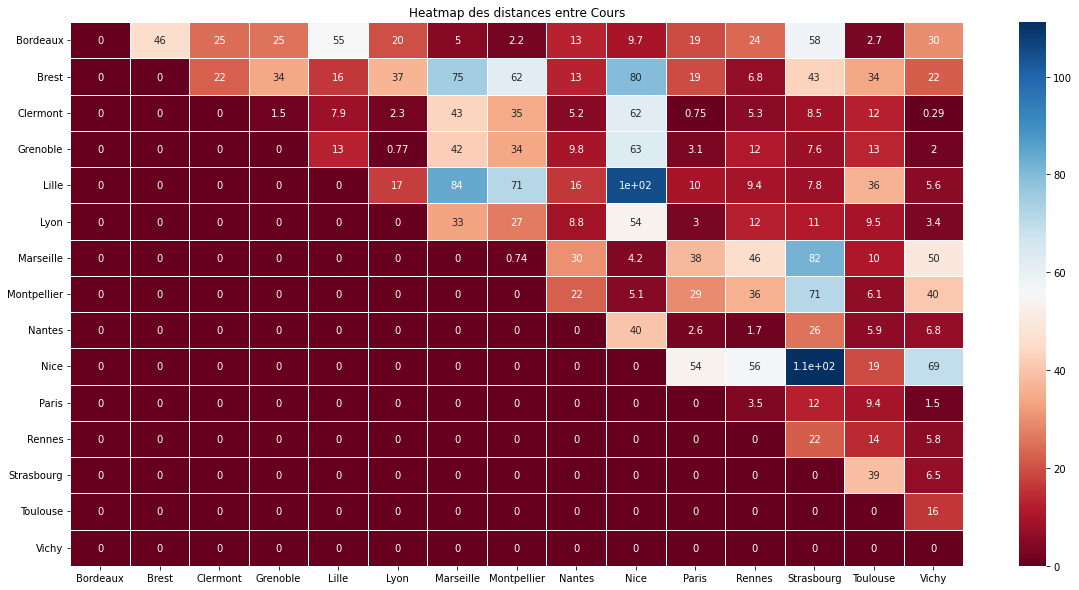

In [16]:
#Initialisation du tableau
dist_pond_tab = pd.DataFrame(np.zeros(shape=(row, row)), index=df.index, columns=df.index) 

#Remplissage du tableau
for i in range(row):
    for j in range(i+1, row):
        dist_pond_tab.values[i, j] = distance(df_scaled.values[i,:], df_scaled.values[j,:])
        
# HeatMap
plt.figure(figsize=(20, 10))
sns.heatmap(dist_pond_tab, cmap='RdBu', linewidths=0.8, annot=True)
plt.title('Heatmap des distances entre Cours')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Informations sur les individus (distance au carrée, poids, inertie)

In [17]:
dist_squared = df_scaled.apply(lambda x : np.sum(x**2), axis=1)
weight = np.ones(row)/row
inertie = weight * dist_squared.values
indiv_infos = pd.DataFrame(np.transpose([dist_squared, weight, inertie]), 
                          columns=['Distance_carre', 'Poids', 'Inertie'], index=df.index)
indiv_infos.round(2)

,Distance_carre,Poids,Inertie
villes,,,
Bordeaux,10.29,0.07,0.69
Brest,21.95,0.07,1.46
Clermont,3.38,0.07,0.23
Grenoble,5.43,0.07,0.36
Lille,18.38,0.07,1.23
Lyon,3.90,0.07,0.26
Marseille,24.22,0.07,1.61
Montpellier,17.45,0.07,1.16
Nantes,1.40,0.07,0.09


***L'inertie représente la quantité d'infos contenue dans nos données. Elle indique la dispersion totale des données***<br>**Elle peut être calculer de 3 manières différentes**

#### Approche 1 : Moyenne des carrées des distances

In [18]:
InK = (1/row**2)*dist_tab.sum().sum()
print(f'Inertie Totale : {InK.round(2)}')

Inertie Totale : 37.14


#### Approche 2 : On peut la voir comme une généralisation multidimensionnelle de la variance. Elle exprime alors la dispersion autour du barycentre G du nuage depoints, défini par le vecteur composé de moyennes des K variables x̄ = (x̄1 , . . . ,x̄K)

In [19]:
meanvar = df.mean(axis=0) # Moyenne des variables
distG = df.apply(lambda x : np.sum((x-meanvar)**2), axis=1)
InK2 = (1/row)*distG.sum()
print(f'Inertie Totale : {InK2.round(2)}')

Inertie Totale : 37.14


#### Approche 3 : Somme des variances des variables

In [20]:
InK3 = df.var(ddof=0).sum()
print(f'Inertie Totale : {InK3.round(2)}')

Inertie Totale : 37.14


***Lorsque nos var sont centrées et réduites, l'inertie est égale au nombre de variable soit K car la variance de nos variables sera égale à 1***

In [21]:
print(f'Inertie Totale (centrée-réduite): {df_scaled.var(ddof=0).sum().round(2)}')

Inertie Totale (centrée-réduite): 12.0


# MISE EN ŒUVRE DE L'ACP

*Deux procédures permettent de mettre en œuvre une ACP:*<br>
* **La Diagonalisation des matrices de corrélation**
* **La Décomposition en valeurs singulières de la matrice des données centrées et réduites (Approche Alternative)**

## Diagonalisation des matrices de corrélation

***On cherche à projeter orthogonalement le nuage de points sur un espace Fk de dimension k < p.<br>On cherche donc Fk , sous espace de dimension k deFp , tel que l’inertie du nuage projeté sur Fk soit maximale.<br>La projection sur k variables est obtenue en considérant les k plus grandes valeurs propres λ1 ≥ . . . ≥ λk ≥ 0 du DF et les vecteurs propres a1 , . . . , ak***

In [22]:
# Diagonalisation
eigenvalues, eigenvectors = np.linalg.eig(corr)

# Dataframe des valeurs propres
inertie_ = np.array([100*i/sum(eigenvalues) for i in range(col)])
inertie_cum = np.cumsum(inertie_)
eigen_df = pd.DataFrame(np.transpose([eigenvalues.round(2), inertie_.round(2), inertie_cum.round(2)]), 
                        index=[f"Dim{i+1}" for i in range(col)], 
                        columns=['Valeurs Propres', 'Pourcentage d\'inertie', 'Pourcentage d\'inertie cumulée'])
eigen_df

,Valeurs Propres,Pourcentage d'inertie,Pourcentage d'inertie cumulée
Dim1,9.59,0.00,0.00
Dim2,2.27,8.33,8.33
Dim3,0.07,16.67,25.00
Dim4,0.04,25.00,50.00
Dim5,0.01,33.33,83.33
Dim6,0.01,41.67,125.00
Dim7,0.01,50.00,175.00
Dim8,0.00,58.33,233.33
Dim9,0.00,66.67,300.00
Dim10,0.00,75.00,375.00


## Décomposition en valeurs singulières

**Avantages**<br>
* *Ne nécessite pas de calcul de la matrice des corrélations*
* *Montre bien le caractère dual de l'analyse*

In [23]:
# Décomposition
U, delta, V = np.linalg.svd(df_scaled)

δ représente les valeurs singulières. Pour obtenir les vraies valeurs propres (inerties) du nuage,on applique une correction aux δ obtenues par décomposition :***λ sub α =(δ sup 2 sub α) / n***<br>**sub** => en indice<br>**sup** => en exposant<br>**n** => nombre d'individus

In [24]:
# Correction des deltas
lambda_ = (delta**2 )/row
a = pd.DataFrame(np.array([delta, lambda_]), columns=[f"Dim{i+1}" for i in range(col)],index=['delta', 'lambda'])
a

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11,Dim12
delta,11.99099,5.838241,1.026367,0.771448,0.460269,0.342337,0.304461,0.162068,0.154644,0.078100,0.064986,0.017123
lambda,9.58559,2.272337,0.070229,0.039675,0.014123,0.007813,0.006180,0.001751,0.001594,0.000407,0.000282,0.000020


***La fonction PCA de Sklearn se base sur une SVD pour son calcul et pour afficher les delta on utilise .singular_values_***

In [ ]:
# Fonction de visualisation des valeurs propres
def screeplot(data,choice=None,figsize=None):
    col = data.shape[0]
    fig,axes = plt.subplots(nrows=1, ncols=2, figsize = figsize)
    axes[0].grid()
    axes[0].set_xlabel('Dimensions',fontsize=14)
    axes[0].set_title('Scree plot',fontsize=14)
    axes[0].set_xticks([x for x in range(1,col+1)])
    
    axes[1].grid()
    axes[1].set_xlabel('Dimensions',fontsize=14)
    axes[1].set_title('Scree plot',fontsize=14)
    axes[1].set_xticks([x for x in range(1,col+1)])
    
    eigen = data.iloc[:,0].round(2)
    ylim = np.max(eigen)+1
    axes[0].set_ylim(0,ylim)
    axes[0].bar(np.arange(1,col+1),eigen.values,width=0.9)
    axes[0].plot(np.arange(1,col+1),eigen.values,c="black")
    axes[0].set_ylabel('Valeurs Propres',fontsize=13)
    for i in range(col):
        axes[0].scatter(i+1,eigen.values[i],color='black',alpha=1)
        axes[0].text(i+.75,0.10+eigen.values[i],str(eigen.values[i]),color = 'black')

    percent = data.iloc[:,1].round()
    axes[1].set_ylim(0,100)
    axes[1].bar(np.arange(1,col+1),percent.values,width=0.9)
    axes[1].plot(np.arange(1,col+1),percent.values,c="black")
    axes[1].set_ylabel('Pourcentage de variance',fontsize=13)
    for i in range(col):
        axes[1].scatter(i+1,percent.values[i],color='black',alpha=1)
        axes[1].text(i+.6,0.10+percent.values[i],f'{percent.values[i]}%',color = 'black',
                  fontweight='bold',fontsize=12)
    plt.show()

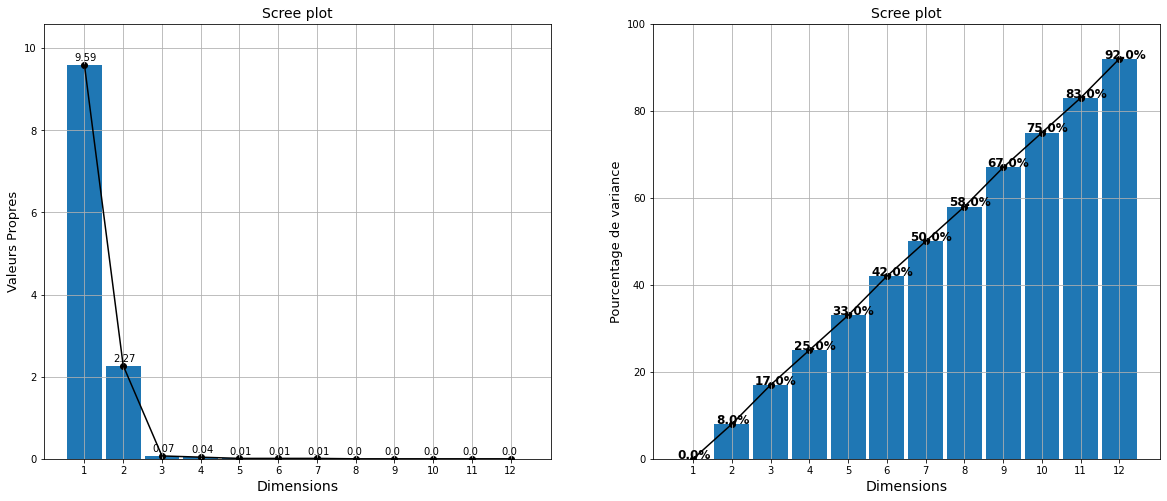

In [26]:
# Affichage
screeplot(eigen_df, figsize=(20, 8))
# screeplot(eigen_df, choice="percentage",figsize=(8, 5))

## Choix du nombre d'axes

Il y a deux manières pour déterminer le nombre d’axes à prendre en compte :

* **Un critère “absolu”** : Ne retenir que les axes dont les valeurs propres sont supérieures à 1 (c’est le critère de Kaiser).
* **Un critère “relatif”** : Retenir les valeurs propres qui dominent les autres, en se référant au graphique en barres(screeplot) des valeurs propres.

Il est important que les valeurs propres des axes retenus restituent une “bonne proportion” de l’analyse. Cela signifie que la somme de l’inertie expliquée par chacun des axes représente une partie importante de l’inertie totale.

Lors d'une ACP, l'inertie totale de chacun des nuages (individus et variables) est égale au nombre de variables actives soit 9 dans notre cas.<br>Le 1er facteur avec une inertie(valeur propre) de **9.59** représente **80% de l'inertie des nuages dans l'espace tout entier.**<br>Le 2e facteur a une inertie de **2.27 soit 18%**

Les 2 premiers facteurs totalisent **98% d'inertie totale**

## Représentation des Individus et des Variables

### Nuage des individus

Pour avoir ce nuage, il faut calculer **coordonnées factorielles** des individus.<br>
Pour celà, il suffit d'effectuer le **produit de la matrice des vecteurs propres et de la matrice des données centrées réduites**

In [27]:
# Coordonnées Factorielles
coord_fac = np.dot(df_scaled, eigenvectors)
indiv_coord = pd.DataFrame(coord_fac, columns=[f"Dim{i+1}" for i in range(col)], index=df.index)
indiv_coord.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11,Dim12
villes,,,,,,,,,,,,
Bordeaux,3.121033,-0.108931,-0.719661,-0.022911,0.015458,0.007852,0.128891,-0.010209,-0.022715,-0.016621,-0.001385,-0.004240
Brest,-2.266822,-4.094258,0.116542,-0.036395,0.093145,0.149897,-0.005966,-0.028970,0.003581,-0.021854,0.006690,0.000759
Clermont,-1.724787,0.589642,-0.018499,-0.165537,-0.148380,-0.034580,0.007286,0.008545,-0.064375,0.002114,-0.002708,-0.002780
Grenoble,-1.528143,1.684081,-0.132437,-0.399956,0.280462,0.044246,-0.064167,0.013687,-0.007268,0.008081,-0.014625,0.002421
Lille,-4.227954,-0.576943,0.360005,-0.012853,0.052100,-0.075199,0.175519,0.006293,-0.030244,0.025391,0.006385,-0.002545


In [28]:
# Visualisation du nuages
def pca_plot_indiv(data, eigenvalue, axe_x, axe_y, figsize=None):
    try:
        if axe_x == axe_y:
            raise ValueError('Erreur: Les deux doivent être différent')
        elif axe_x > axe_y:
            raise ValueError('Erreur: L\'axe x doit être inférieur à l\'axe y')
        elif axe_x < 0 or axe_y <0:
            raise ValueError('Erreur: Les axes doivent être supérieur à 0')
        else:
            row = df.shape[0]
            X = np.array(data)
            eigen_percent = np.array([100*i/sum(eigenvalue) for i in eigenvalue]) # % de valeurs propres
            dim_x = round(eigen_percent[axe_x], 2) 
            dim_y = round(eigen_percent[axe_y], 2)
            x_max = np.abs(X[:, axe_x]).max() *1.1
            y_max = np.abs(X[:, axe_y]).max() *1.1
            fig, ax = plt.subplots(figsize=figsize)
            ax.grid()
            ax.axis([-8, 8, -6, 6])
            ax.set_title('Projection des individus')
            ax.set_xlim(left=-x_max, right=x_max)
            ax.set_ylim(bottom= -y_max, top=y_max)
            ax.set_xlabel(f'Dim {axe_x + 1} ({dim_x}%)')
            ax.set_ylabel(f'Dim {axe_y + 1} ({dim_y}%)')
            for i in range(row):
                plt.scatter(data.iloc[i, axe_x], data.iloc[i, axe_y], c="blue")
                ax.text(data.iloc[i, axe_x], data.iloc[i, axe_y], data.index[i], color="blue", 
                        fontsize=10, ha="left", va="center")
            plt.show()
    except ValueError as error:
        print(error)

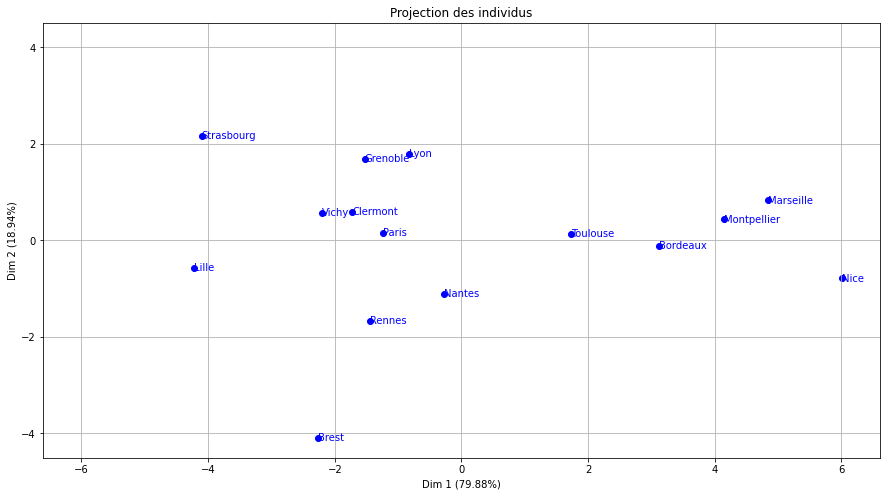

In [29]:
pca_plot_indiv(indiv_coord, eigenvalues, axe_x=0, axe_y=1, figsize=(15, 8))

### Nuage des variables

Calcule de la distance euclidienne entre variables **d(x,y) = 2(1-corr(x,y))** => **0 <= d <= 4**

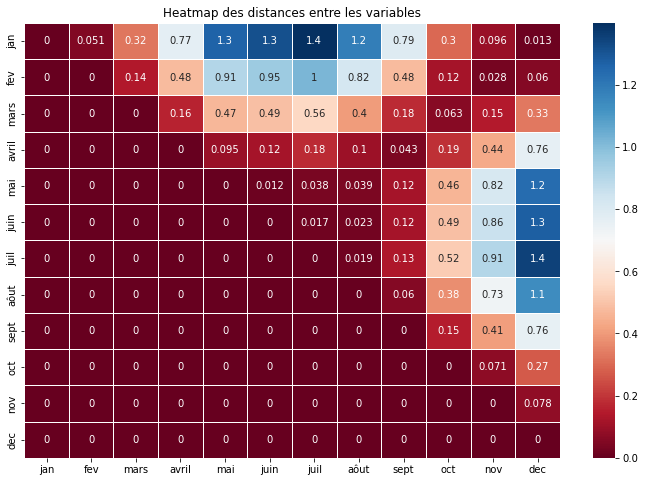

In [30]:
#Initialisation d'un df vide pour stocker nos distances
dist_var = pd.DataFrame(np.zeros(shape=(col, col)), index=df.columns, columns=df.columns)

for i in range(col):
    for j in range(i+1, col):
        dist_var.iloc[i, j] = 2*(1-corr.iloc[i, j]) # corr est la matrice de corrélation calculé plus haut
        
# Visualisation
plt.figure(figsize=(12, 8))
sns.heatmap(dist_var, cmap='RdBu', linewidths=0.8, annot=True)
plt.title('Heatmap des distances entre les variables')
plt.show()

#### Coordonnées factorielles des variables
La coordonnée d’un point-variable sur un axe n’est autre que le coefficient de corrélation de cette variable avec le facteur Fα (combinaison linaire des variables). <br>
**Gα (k) = Corr(k,Fα )**. <br>
Pour calculer les coordonnées factorielles d'un point **α**, on multiplie son vecteur propre **uα** par la racine de sa valeur propre **sqrt(λα)** <br>
**Gα = uα(sqrt(λα))**

In [31]:
coord_var = pd.DataFrame(eigenvectors * np.sqrt(eigenvalues), index=df.columns)

#Cercle de corrélation
def pca_plot_var(data, eigenvalue, axe_x, axe_y, figsize=None):
    try:
        if axe_x == axe_y:
            raise ValueError('Erreur: Les deux doivent être différent')
        elif axe_x > axe_y:
            raise ValueError('Erreur: L\'axe x doit être inférieur à l\'axe y')
        elif axe_x < 0 or axe_y <0:
            raise ValueError('Erreur: Les axes doivent être supérieur à 0')
        else:
            row = data.shape[0]
            eigen_percent = np.array([100*i/sum(eigenvalue) for i in eigenvalue])
            dim_x = round(eigen_percent[axe_x], 2) 
            dim_y = round(eigen_percent[axe_y], 2)
            
            fig, axes = plt.subplots(figsize=figsize)
            axes.grid()
            axes.axis([-1.5,1.5,-1.5,1.5])
            axes.set_title("Cercle de corrélation")
            axes.set_xlabel(f"Dim.{1+axe_x} ({dim_x}%)")
            axes.set_ylabel(f"Dim.{1+axe_y} ({dim_y}%)")
            
            for i in range(row):
                axes.arrow(0,0,data.iloc[i,axe_x],data.iloc[i,axe_y],
                head_width = 0.02,head_length = 0.02,color='black')
                axes.text(data.iloc[i,axe_x],data.iloc[i,axe_y],data.index[i],color = "red")
                
            circle = Ellipse((0,0),width = 2, height = 2,facecolor = "none",
            edgecolor = "blue")
            axes.add_patch(circle)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    except ValueError as error:
        print(error)

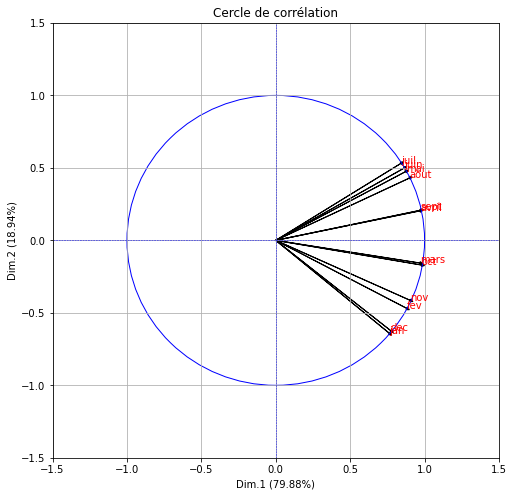

In [32]:
pca_plot_var(data=coord_var, eigenvalue=eigenvalues, axe_x=0, axe_y=1, figsize=(8, 8))